### Arrests (Derek N.)

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from fpsnippets import geo_to_neighborhood
%matplotlib inline

In [3]:
arrestdata = pd.read_csv("arrests.csv")
arrestdata.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


This is a preview of the arrests data, covering a lot of metrics. But, what if we don't care about half of them? Good thing we have the drop function!

In [4]:
arrestdata.drop('_id', inplace=True, axis=1)
arrestdata.drop('PK', inplace=True, axis=1)
arrestdata.drop('CCR', inplace=True, axis=1)
arrestdata.drop('AGE', inplace=True, axis=1)
arrestdata.drop('GENDER', inplace=True, axis=1)
arrestdata.drop('RACE', inplace=True, axis=1)
arrestdata.drop('ARRESTLOCATION', inplace=True, axis=1)
arrestdata.drop('INCIDENTLOCATION', inplace=True, axis=1)
arrestdata.drop('INCIDENTNEIGHBORHOOD', inplace=True, axis=1)
arrestdata.drop('INCIDENTZONE', inplace=True, axis=1)
arrestdata.drop('INCIDENTTRACT', inplace=True, axis=1)
arrestdata.drop('COUNCIL_DISTRICT', inplace=True, axis=1)
arrestdata.drop('PUBLIC_WORKS_DIVISION', inplace=True, axis=1)
arrestdata.head()

,ARRESTTIME,OFFENSES,X,Y
0,2016-08-24T12:20:00,3929 Retail Theft.,-79.949277,40.452551
1,2016-08-03T14:55:00,13(a)(16) Possession of Controlled Substance,-80.088018,40.440136
2,2016-08-03T16:45:00,3929 Retail Theft.,-79.891803,40.486625
3,2016-08-05T02:36:00,5503 Disorderly Conduct. / 5505 Public Drunken...,-80.001939,40.454080
4,2016-08-06T02:00:00,2702 Aggravated Assault. / 2705 Recklessy Enda...,-80.052204,40.445900


That looks a lot better! We have the time of the arrest, the offenses, and the exact geolocation. Now, to count how many per neighborhood.

In [5]:
values = str(len(arrestdata))
print("There were " + values + " total arrests in the City of Pittsburgh")

There were 65148 total arrests in the City of Pittsburgh


Before we do that, I wanted to give an idea of how many arrests there were within the entire CSV file. This will allow us to compare percentages easier. For the purposes of this project, we will be using 1000 of these datasets, which I will take the first 1000 given!

In [6]:
newarrest = pd.read_csv("arrestsfinal.csv")
newarrest.drop('_id', inplace=True, axis=1)
newarrest.drop('PK', inplace=True, axis=1)
newarrest.drop('CCR', inplace=True, axis=1)
newarrest.drop('AGE', inplace=True, axis=1)
newarrest.drop('GENDER', inplace=True, axis=1)
newarrest.drop('RACE', inplace=True, axis=1)
newarrest.drop('ARRESTLOCATION', inplace=True, axis=1)
newarrest.drop('INCIDENTLOCATION', inplace=True, axis=1)
newarrest.drop('INCIDENTZONE', inplace=True, axis=1)
newarrest.drop('INCIDENTTRACT', inplace=True, axis=1)
newarrest.drop('COUNCIL_DISTRICT', inplace=True, axis=1)
newarrest.drop('PUBLIC_WORKS_DIVISION', inplace=True, axis=1)
newarrest.tail()

,ARRESTTIME,OFFENSES,INCIDENTNEIGHBORHOOD,X,Y
994,2016-09-04T10:25:00,2701 Simple Assault.,Spring Hill-City View,-79.992562,40.469746
995,2016-09-04T17:29:00,9501 Bench Warrant,Central Northside,-80.005968,40.458993
996,2016-09-04T17:40:00,5123 Contraband. / 13(a)(16) Possession of Con...,Esplen,-80.053303,40.463699
997,2016-09-07T10:38:00,2701 Simple Assault. / 5123 Contraband. / 13(a...,Beechview,-80.017805,40.408521
998,2016-09-07T10:38:00,2701 Simple Assault. / 2705 Recklessy Endanger...,Beechview,-80.017805,40.408521


In [7]:
table = {}
for index, row in newarrest.iterrows():
    if type(row["INCIDENTNEIGHBORHOOD"]) == float:
        continue
    name = row["INCIDENTNEIGHBORHOOD"]
    if name == None:
        continue
    table[name] = 0
    
for index, row in newarrest.iterrows():
    if type(row["INCIDENTNEIGHBORHOOD"]) == float:
        continue
    name = row["INCIDENTNEIGHBORHOOD"]
    if name == None:
        continue
    table[name] = table[name] + 1 or 1
        
        
for i in table:
    print(i + ": " + str(table[i]), end = " ")
    print()

Bloomfield: 17 
Outside City: 7 
Westwood: 6 
East Allegheny: 49 
Crafton Heights: 12 
Greenfield: 8 
Brookline: 25 
Regent Square: 2 
East Liberty: 21 
East Hills: 24 
Carrick: 30 
Allegheny Center: 29 
South Side Flats: 58 
Sheraden: 27 
East Carnegie: 2 
Golden Triangle/Civic Arena: 73 
Point Breeze North: 6 
Perry South: 17 
Allentown: 14 
North Shore: 20 
Marshall-Shadeland: 14 
Central Oakland: 16 
Middle Hill: 11 
Strip District: 9 
Lincoln-Lemington-Belmar: 16 
Central Northside: 17 
Troy Hill-Herrs Island: 5 
Highland Park: 10 
Homewood North: 30 
Northview Heights: 11 
Brighton Heights: 12 
Hazelwood: 21 
Perry North: 9 
Bedford Dwellings: 7 
Elliott: 18 
Beechview: 21 
Fineview: 20 
Glen Hazel: 4 
Spring Hill-City View: 8 
Bluff: 12 
Manchester: 2 
Homewood West: 15 
Outside County: 5 
Point Breeze: 3 
Homewood South: 28 
Squirrel Hill South: 7 
Terrace Village: 7 
Upper Lawrenceville: 2 
Arlington: 6 
South Side Slopes: 10 
Lower Lawrenceville: 3 
Garfield: 10 
Lincoln Plac

### Percentage of Arrests per Neighborhood

In [17]:
for i in table:
    print(i + " (Percentage of Arrests): " + str(round(table[i]/1000 * 100, 2)))
    print("--------")

Bloomfield (Percentage of Arrests): 1.7
--------
Outside City (Percentage of Arrests): 0.7
--------
Westwood (Percentage of Arrests): 0.6
--------
East Allegheny (Percentage of Arrests): 4.9
--------
Crafton Heights (Percentage of Arrests): 1.2
--------
Greenfield (Percentage of Arrests): 0.8
--------
Brookline (Percentage of Arrests): 2.5
--------
Regent Square (Percentage of Arrests): 0.2
--------
East Liberty (Percentage of Arrests): 2.1
--------
East Hills (Percentage of Arrests): 2.4
--------
Carrick (Percentage of Arrests): 3.0
--------
Allegheny Center (Percentage of Arrests): 2.9
--------
South Side Flats (Percentage of Arrests): 5.8
--------
Sheraden (Percentage of Arrests): 2.7
--------
East Carnegie (Percentage of Arrests): 0.2
--------
Golden Triangle/Civic Arena (Percentage of Arrests): 7.3
--------
Point Breeze North (Percentage of Arrests): 0.6
--------
Perry South (Percentage of Arrests): 1.7
--------
Allentown (Percentage of Arrests): 1.4
--------
North Shore (Percenta

### Weighted Values of Arrests throughout the City of Pittsburgh

In [18]:
for i in table:
    print(i + ": " + str(round(1 - (table[i]/1000 * 10), 2)))
    print("--------")

Bloomfield: 0.83
--------
Outside City: 0.93
--------
Westwood: 0.94
--------
East Allegheny: 0.51
--------
Crafton Heights: 0.88
--------
Greenfield: 0.92
--------
Brookline: 0.75
--------
Regent Square: 0.98
--------
East Liberty: 0.79
--------
East Hills: 0.76
--------
Carrick: 0.7
--------
Allegheny Center: 0.71
--------
South Side Flats: 0.42
--------
Sheraden: 0.73
--------
East Carnegie: 0.98
--------
Golden Triangle/Civic Arena: 0.27
--------
Point Breeze North: 0.94
--------
Perry South: 0.83
--------
Allentown: 0.86
--------
North Shore: 0.8
--------
Marshall-Shadeland: 0.86
--------
Central Oakland: 0.84
--------
Middle Hill: 0.89
--------
Strip District: 0.91
--------
Lincoln-Lemington-Belmar: 0.84
--------
Central Northside: 0.83
--------
Troy Hill-Herrs Island: 0.95
--------
Highland Park: 0.9
--------
Homewood North: 0.7
--------
Northview Heights: 0.89
--------
Brighton Heights: 0.88
--------
Hazelwood: 0.79
--------
Perry North: 0.91
--------
Bedford Dwellings: 0.93
--

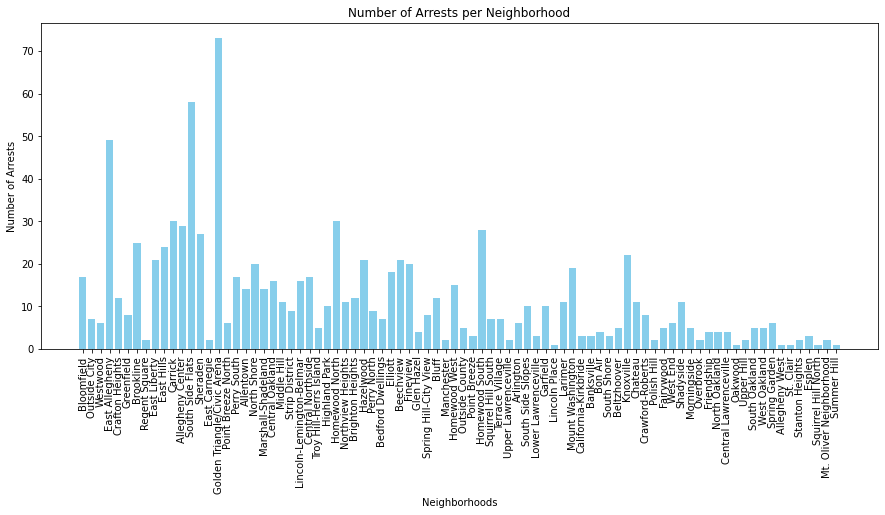

In [12]:
combined_data = {
    'Offenses': [],
    'Locations': []
}

for i in table:
    combined_data["Offenses"].append(int(table[i]))
    if type(i) == float:
        i = 0
    combined_data["Locations"].append(i)    
    
newarrest = pd.DataFrame(combined_data)
plt.figure(figsize = (15,6))
plt.bar(newarrest['Locations'], newarrest['Offenses'], color='skyblue')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Arrests')
plt.title('Number of Arrests per Neighborhood')
plt.xticks(rotation=90)
plt.show()

### Analysis

As the data shows, the Golden Triangle is the neighborhood with the most arrests, covering almost 1/2 of arrest data throughout the City of Pittsburgh. They have the highest percentage of arrests, but the lowest weighted value, because they are the worst. The highest weighted value is shared between a couple of neighborhoods, showing that they have the lowest amount of arrests in the City of Pittsburgh. 